# Azure SQL Query for the Top 10 most Profitable Items**

SELECT TOP 10

    Product_Name,
    SUM(Product_Price) AS Total_Profit
FROM

    ProductData
GROUP BY

    Product_Name
ORDER BY

    Total_Profit DESC;


# Google Colab Module for the Top 10 most profitable products and their categories, then sorted by profit in descending order then represented in a Bar-Graph

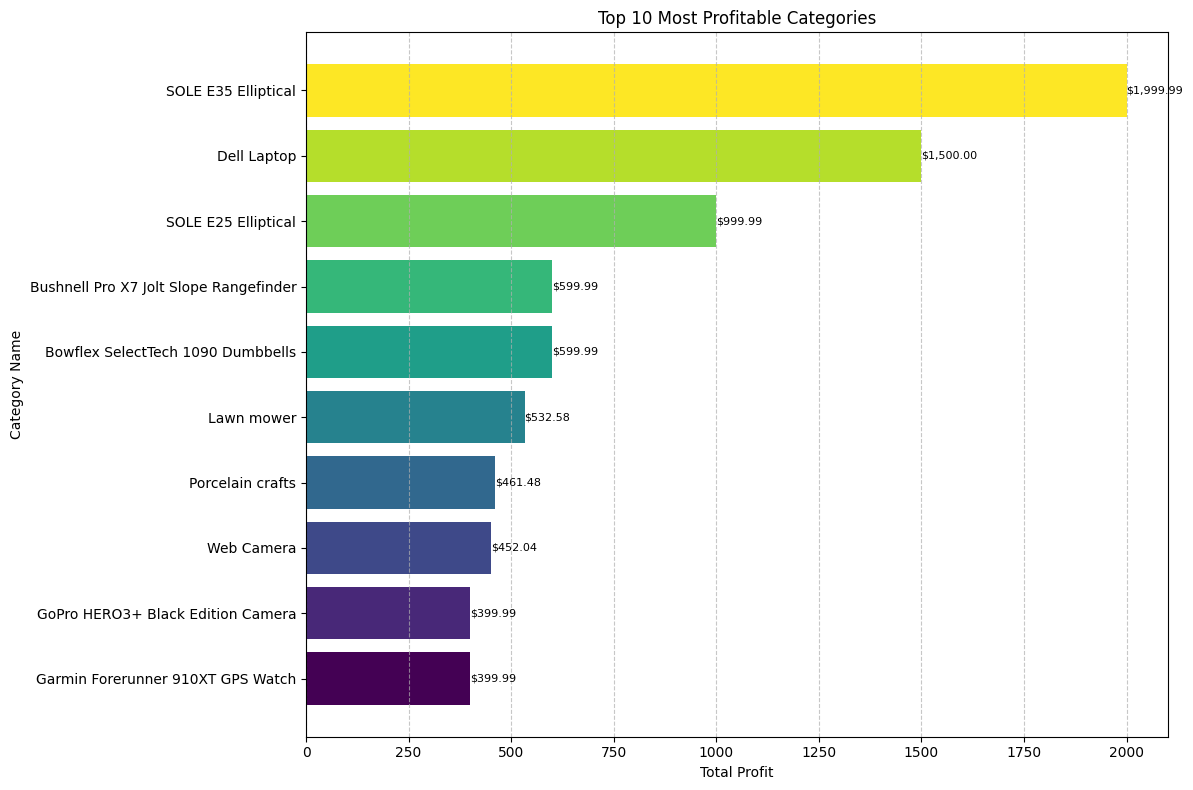

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df_TOP10_Items = pd.read_csv("TOP10_Items.csv")

# Sort the DataFrame by 'Total_Profit' column in descending order
df_sorted = df_TOP10_Items.sort_values(by='Total_Profit', ascending=True)

# Define custom colors
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Product_Name'], df_sorted['Total_Profit'], color=colors)

# Add labels and title
plt.xlabel('Total Profit')
plt.ylabel('Category Name')
plt.title('Top 10 Most Profitable Categories')

# Add annotations for each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'${bar.get_width():,.2f}',
             va='center', ha='left', fontsize=8, color='black')

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Azure SQL Query for Top 10 Categories

SELECT TOP 10

    Category_Name,
    SUM(Product_Price) AS Total_Profit
FROM

    ProductData
GROUP BY

    Category_Name
ORDER BY

    Total_Profit DESC;

# Google Colab Module for the Top 10 most profitable categories and then represented in a Pie-Chart

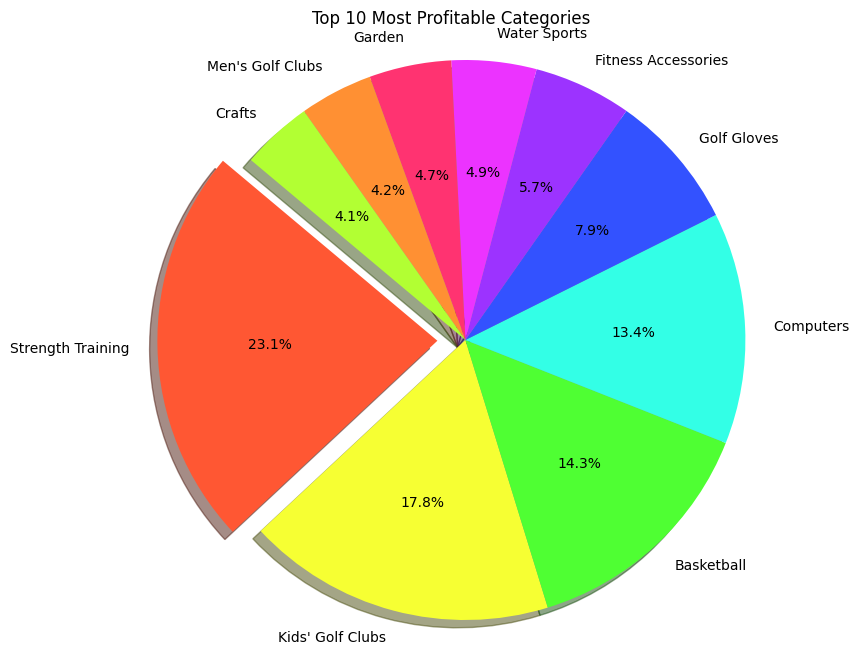

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_Top10_Categories = pd.read_csv("Top10_Categories.csv")

# Group data by category and calculate total profit for each category
category_profit = df_Top10_Categories.groupby('Category_Name')['Total_Profit'].sum()

# Sort categories by total profit in descending order
category_profit = category_profit.sort_values(ascending=False)

# Select top 10 most profitable categories
top_10_categories = category_profit.head(10)

# Custom colors for the pie chart
colors = ['#FF5733', '#F6FF33', '#4FFF33', '#33FFE6', '#3352FF', '#9C33FF', '#EC33FF', '#FF3371', '#FF9033', '#B2FF33']

# Explode the slice with the highest profit
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plotting the pie chart for top 10 categories with customizations
plt.figure(figsize=(10, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 Most Profitable Categories')
plt.show()
